<a href="https://colab.research.google.com/github/anxexcalibur/ArduinoTempMonitor_AnaliseDadosPython/blob/main/An%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:red;">Banco de dados:<h1>

In [ ]:
!pip install pymongo


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.9/648.9 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 34.3 MB/s eta 0:00:00


In [ ]:
from pymongo import MongoClient
from statistics import mean


# Informações de conexão
username = 'root123'
password = 'root123'
host = 'gabinetethermologdb.oblbr1v.mongodb.net'
database = 'GabineteThermoLogDB'

# Cria a string de conexão
uri = f"mongodb+srv://{username}:{password}@{host}/{database}?retryWrites=true&w=majority"

# Conecta ao banco de dados
client = MongoClient(uri)

# Acessa o banco de dados
db = client[database]

# Acessa a coleção desejada
collection = db['dados_pc_fechado_pouco_uso_manhã']

# Imprime a coleção (Teste)
print(collection)

# Recupera os documentos da coleção
documents = collection.find({})

cont = 0
# Testando o acesso aos documentos
print(documents)
media = []
for document in documents:
    media.append(document['Temperatura'])


print(mean(media))


Collection(Database(MongoClient(host=['ac-ryjbhb5-shard-00-01.oblbr1v.mongodb.net:27017', 'ac-ryjbhb5-shard-00-02.oblbr1v.mongodb.net:27017', 'ac-ryjbhb5-shard-00-00.oblbr1v.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-txt34n-shard-0', tls=True), 'GabineteThermoLogDB'), 'dados_pc_fechado_pouco_uso_manhã')
30.938529411764705


<h1> Codigos, Graficos:<h1>


In [ ]:
# Dicionário para armazenar os DataFrames
dataframes = {}

# Transforma cada coleção em DataFrame
for colecao in colecoes:
    # Acessa a coleção
    collection = db[colecao]
    # Método para acessar os documentos armazenados na coleção
    documents = collection.find({})
    # Cria uma lista com os dados de cada documento
    lista_documentos = [doc for doc in documents]
    # Cria o DataFrame a partir da lista de dicionários
    df = pd.DataFrame(lista_documentos)
    # Armazena o DataFrame no dicionário usando o nome da coleção como chave
    dataframes[colecao] = df

NameError: ignored

In [ ]:

# Criar uma figura e um conjunto de eixos com tamanho maior
fig, ax = plt.subplots(figsize=(10, 8))

# Plotar as linhas para cada cenário com marcadores maiores e estilos visuais
# Lista de coleções com o nome das coleções
colecoes = ['dados_pc_aberto_muito_uso_manhã', 'dados_pc_aberto_muito_uso_2_noite',
            'dados_pc_aberto_pouco_uso_manhã', 'dados_pc_aberto_pouco_uso_2_noite',
            'dados_pc_fechado_muito_uso_manhã', 'dados_pc_fechado_muito_uso_2_noite',
            'dados_pc_fechado_pouco_uso_manhã', 'dados_pc_fechado_pouco_uso_2_noite']
for colecao, df in dataframes.items():
    ax.plot(df['Temperatura'], label=colecao, marker='o', markersize=3, linestyle='solid', lw=8)

# Configurar os rótulos dos eixos e o título do gráfico com tamanho de fonte maior
ax.set_xlabel('Amostras', fontsize=12)
ax.set_ylabel('Temperatura', fontsize=12)
ax.set_title('Cenários de Temperatura do PC', fontsize=14)
# Padroniza o intervalos da temperatura
ax.set_ylim(24, 40)
ax.set_yticks(range(24, 40, 2))
ax.set_xlim(0,4600, 500)
# Aumentar o tamanho dos marcadores na legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=10)

# Aumentar o tamanho dos rótulos dos eixos e dos números nos eixos
plt.xticks([0, 500, 1000, 1500,2000,2500,3000,3500,4000])
plt.yticks()
ax.tick_params(labelsize=10)

# Salvar o gráfico com tamanho completo
plt.savefig('/content/grafico_temperatura.png', bbox_inches='tight')
plt.show()


Grafíco das Médias

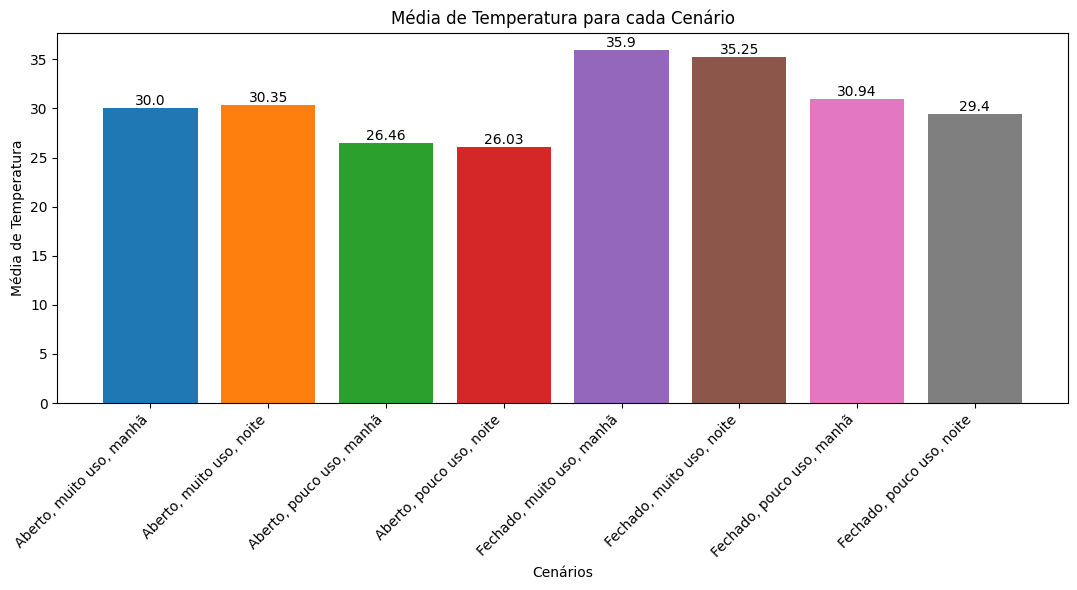

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de coleções com o nome das coleções
colecoes = ['dados_pc_aberto_muito_uso_manhã', 'dados_pc_aberto_muito_uso_2_noite',
            'dados_pc_aberto_pouco_uso_manhã', 'dados_pc_aberto_pouco_uso_2_noite',
            'dados_pc_fechado_muito_uso_manhã', 'dados_pc_fechado_muito_uso_2_noite',
            'dados_pc_fechado_pouco_uso_manhã', 'dados_pc_fechado_pouco_uso_2_noite']

# Dicionário para mapear nomes originais para nomes abreviados
abreviacoes = {
    'dados_pc_aberto_muito_uso_manhã': 'Aberto, muito uso, manhã',
    'dados_pc_aberto_muito_uso_2_noite': 'Aberto, muito uso, noite',
    'dados_pc_aberto_pouco_uso_manhã': 'Aberto, pouco uso, manhã',
    'dados_pc_aberto_pouco_uso_2_noite': 'Aberto, pouco uso, noite',
    'dados_pc_fechado_muito_uso_manhã': 'Fechado, muito uso, manhã',
    'dados_pc_fechado_muito_uso_2_noite': 'Fechado, muito uso, noite',
    'dados_pc_fechado_pouco_uso_manhã': 'Fechado, pouco uso, manhã',
    'dados_pc_fechado_pouco_uso_2_noite': 'Fechado, pouco uso, noite'
}

# Dicionário para armazenar os DataFrames
dataframes = {}

# Transforma cada coleção em DataFrame
for colecao in colecoes:
    # Acessa a coleção
    collection = db[colecao]
    # Método para acessar os documentos armazenados na coleção
    documents = collection.find({})
    # Cria uma lista com os dados de cada documento
    lista_documentos = [doc for doc in documents]
    # Cria o DataFrame a partir da lista de dicionários
    df = pd.DataFrame(lista_documentos)
    # Armazena o DataFrame no dicionário usando o nome da coleção como chave
    dataframes[colecao] = df

# Calcula a média da temperatura para cada cenário
medias_temperatura = []
for colecao in colecoes:
    media = dataframes[colecao]['Temperatura'].mean()
    medias_temperatura.append(media)

# Configuração das cores para cada cenário
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Cria o gráfico de barras com as médias de temperatura para cada cenário
plt.figure(figsize=(11, 6))  # Tamanho do gráfico ajustado
bars = plt.bar(range(len(colecoes)), medias_temperatura, color=cores)
plt.xticks(range(len(colecoes)), [abreviacoes[colecao] for colecao in colecoes], rotation=45, ha='right')  # Rótulos ajustados
plt.xlabel('Cenários')
plt.ylabel('Média de Temperatura')
plt.title('Média de Temperatura para cada Cenário')

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('/content/grafico_media_temperatura.png')
plt.show()



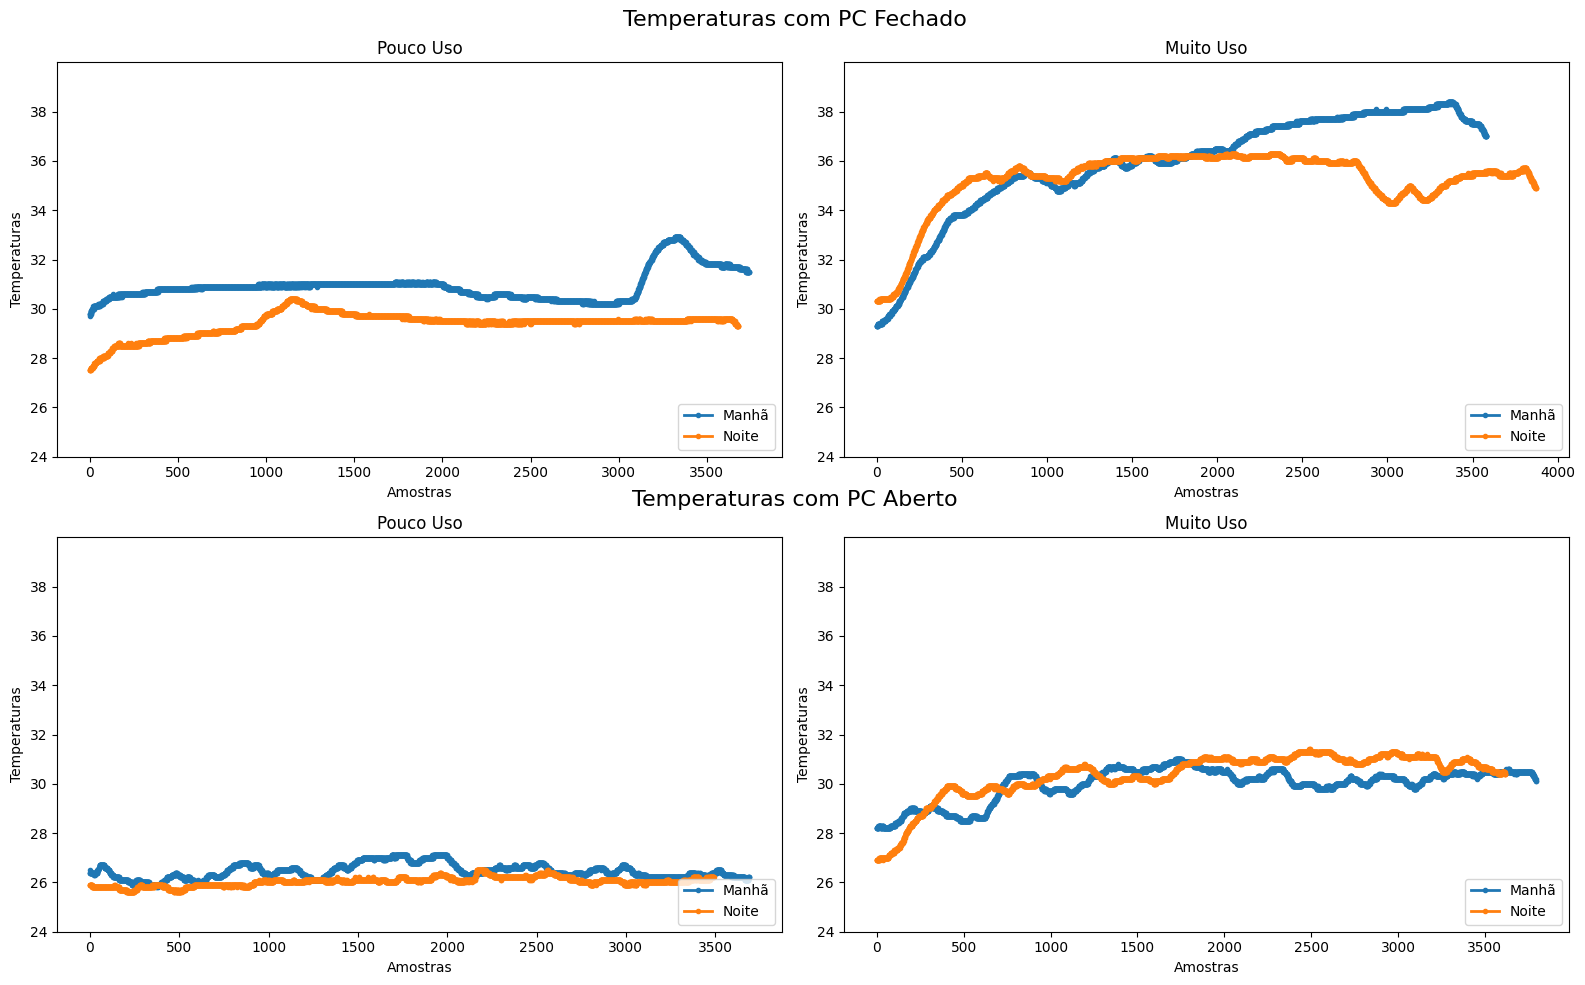

In [ ]:
import matplotlib.pyplot as plt

# Criar uma figura com uma grade de 2 por 2
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Temperaturas com PC Fechado', fontsize=16)

# Primeiro gráfico (linha 0, coluna 0)
ax1 = axes[0, 0]
ax1.plot(dataframes['dados_pc_fechado_pouco_uso_manhã']['Temperatura'], label='Manhã', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax1.plot(dataframes['dados_pc_fechado_pouco_uso_2_noite']['Temperatura'], label='Noite', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax1.set_xlabel('Amostras')
ax1.set_ylabel('Temperaturas')
ax1.legend(loc='lower right')
ax1.set_title('Pouco Uso')
ax1.set_ylim(24,40)
ax1.set_yticks(range(24, 39, 2))

# Segundo gráfico (linha 0, coluna 1)
ax2 = axes[0, 1]
ax2.plot(dataframes['dados_pc_fechado_muito_uso_manhã']['Temperatura'], label='Manhã', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax2.plot(dataframes['dados_pc_fechado_muito_uso_2_noite']['Temperatura'], label='Noite', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax2.set_xlabel('Amostras')
ax2.set_ylabel('Temperaturas')
ax2.legend(loc='lower right')
ax2.set_title('Muito Uso')
# Padroniza o intervalos da temperatura
ax2.set_ylim(24, 40)
ax2.set_yticks(range(24, 39, 2))
# Segundo Titulo
fig.text(0.5, 0.49, 'Temperaturas com PC Aberto', ha='center', va='center', fontsize=16)

# Terceiro gráfico (linha 1, coluna 0)
ax3 = axes[1, 0]
ax3.plot(dataframes['dados_pc_aberto_pouco_uso_manhã']['Temperatura'], label='Manhã', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax3.plot(dataframes['dados_pc_aberto_pouco_uso_2_noite']['Temperatura'], label='Noite', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax3.set_xlabel('Amostras')
ax3.set_ylabel('Temperaturas')
ax3.set_title('Pouco Uso')
ax3.legend(loc='lower right')
ax3.set_ylim(24, 40)
ax3.set_yticks(range(24, 39, 2))
# Quarto gráfico (linha 1, coluna 1)
ax4 = axes[1, 1]
#
ax4.plot(dataframes['dados_pc_aberto_muito_uso_manhã']['Temperatura'], label='Manhã', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax4.plot(dataframes['dados_pc_aberto_muito_uso_2_noite']['Temperatura'], label='Noite', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax4.set_xlabel('Amostras')
ax4.set_ylabel('Temperaturas')
ax4.set_title('Muito Uso')
ax4.legend(loc='lower right')
ax4.set_ylim(24, 40)
ax4.set_yticks(range(24, 39, 2))
# Ajustar o espaçamento entre os subplots
plt.subplots_adjust(hspace=1, wspace=1)
# Ajusta o espaçamento entre os Gráficos.
plt.tight_layout()

# Exibir o gráfico
# Salva o Grafico
plt.savefig('/content/grafico_comparativo_temperatura.png')
plt.show()


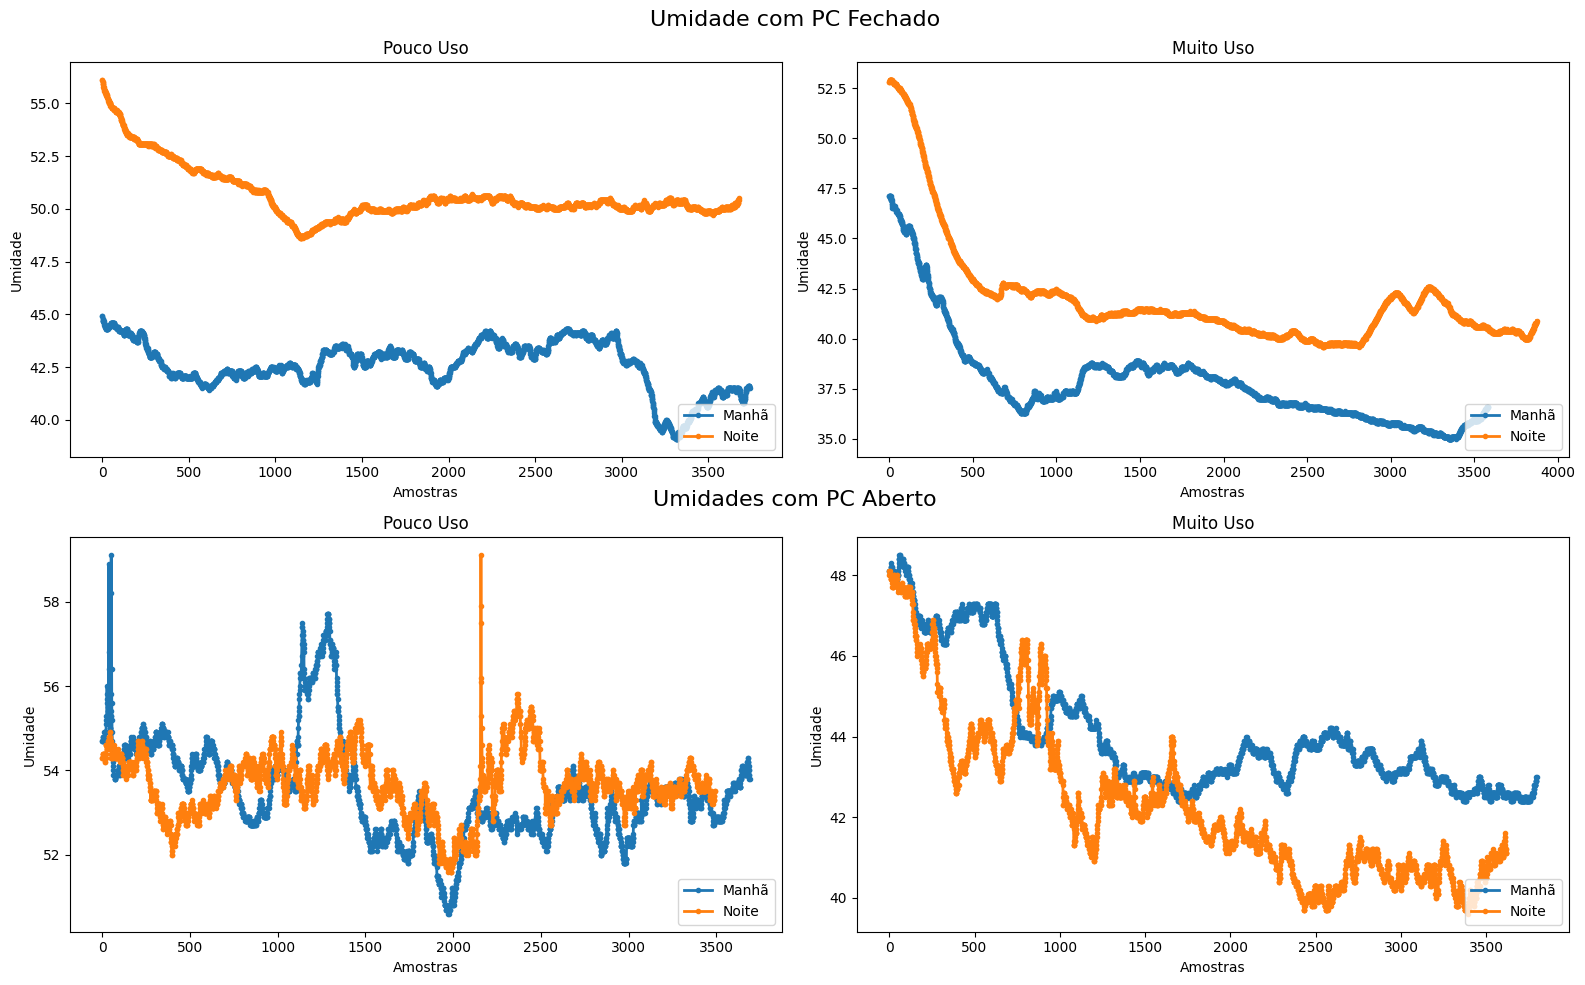

In [ ]:
import matplotlib.pyplot as plt

# Criar uma figura com uma grade de 2 por 2
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Umidade com PC Fechado', fontsize=16)

# Primeiro gráfico (linha 0, coluna 0)
ax1 = axes[0, 0]
ax1.plot(dataframes['dados_pc_fechado_pouco_uso_manhã']['Umidade (%)'], label='Manhã', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax1.plot(dataframes['dados_pc_fechado_pouco_uso_2_noite']['Umidade (%)'], label='Noite', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax1.set_xlabel('Amostras')
ax1.set_ylabel('Umidade')
ax1.legend(loc='lower right')
ax1.set_title('Pouco Uso')


# Segundo gráfico (linha 0, coluna 1)
ax2 = axes[0, 1]
ax2.plot(dataframes['dados_pc_fechado_muito_uso_manhã']['Umidade (%)'], label='Manhã', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax2.plot(dataframes['dados_pc_fechado_muito_uso_2_noite']['Umidade (%)'], label='Noite', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax2.set_xlabel('Amostras')
ax2.set_ylabel('Umidade')
ax2.legend(loc='lower right')
ax2.set_title('Muito Uso')
# Padroniza o intervalos da temperatura

# Segundo Titulo
fig.text(0.5, 0.49, 'Umidades com PC Aberto', ha='center', va='center', fontsize=16)

# Terceiro gráfico (linha 1, coluna 0)
ax3 = axes[1, 0]
ax3.plot(dataframes['dados_pc_aberto_pouco_uso_manhã']['Umidade (%)'], label='Manhã', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax3.plot(dataframes['dados_pc_aberto_pouco_uso_2_noite']['Umidade (%)'], label='Noite', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax3.set_xlabel('Amostras')
ax3.set_ylabel('Umidade')
ax3.set_title('Pouco Uso')
ax3.legend(loc='lower right')

# Quarto gráfico (linha 1, coluna 1)
ax4 = axes[1, 1]
#
ax4.plot(dataframes['dados_pc_aberto_muito_uso_manhã']['Umidade (%)'], label='Manhã', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax4.plot(dataframes['dados_pc_aberto_muito_uso_2_noite']['Umidade (%)'], label='Noite', marker='o', markersize=3, linestyle='solid', lw=2.0)
ax4.set_xlabel('Amostras')
ax4.set_ylabel('Umidade')
ax4.set_title('Muito Uso')
ax4.legend(loc='lower right')

# Ajustar o espaçamento entre os subplots
plt.subplots_adjust(hspace=1, wspace=1)
# Ajusta o espaçamento entre os Gráficos.
plt.tight_layout()

# Exibir o gráfico
# Salva o Grafico
plt.savefig('/content/grafico_comparativo_temperatura.png')
plt.show()